<a href="https://colab.research.google.com/github/Dlogical23/vegas/blob/master/treeeandforestArtless.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

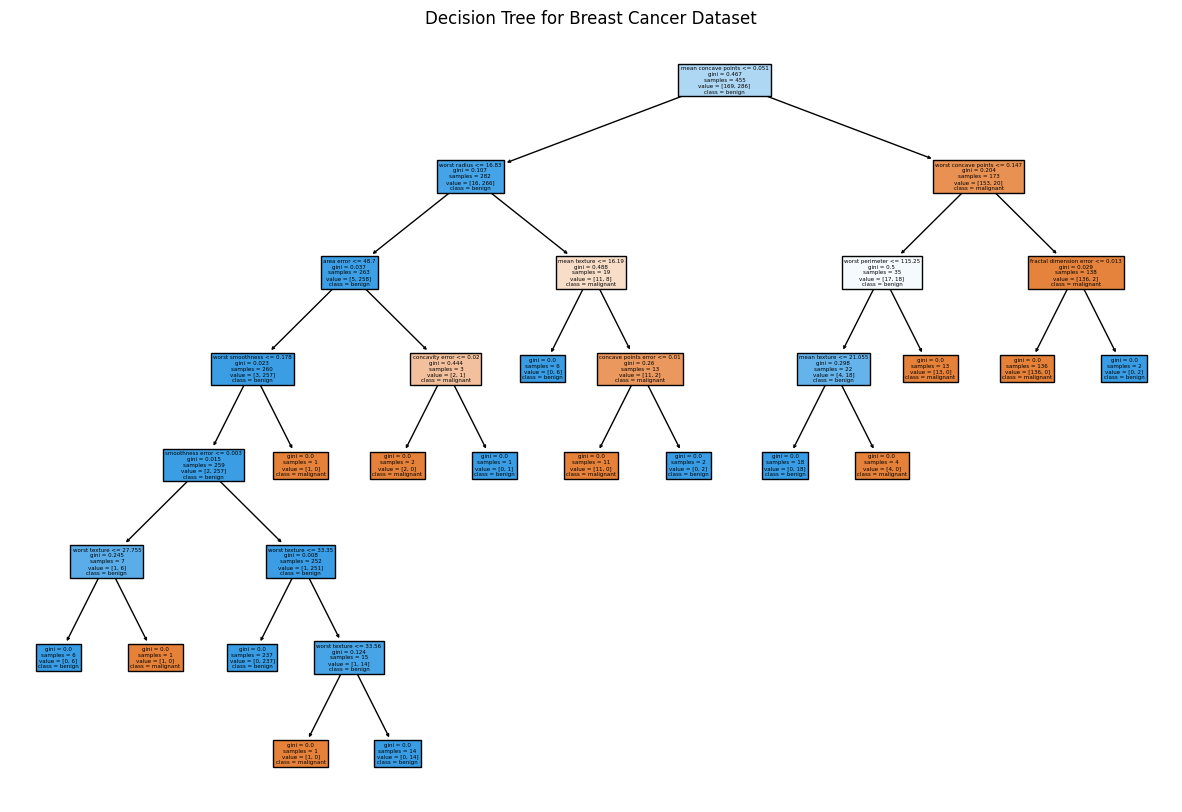

                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fractal dimension    0.005210


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'Decision Tree Accuracy': 0.9473684210526315, 'Random Forest Accuracy': 0.9649122807017544, 'AdaBoost Accuracy': 0.9736842105263158}


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer Wisconsin dataset
cancer_data = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_data.target

# Split the dataset into training and testing sets
X_cancer = cancer_df.drop('target', axis=1)
y_cancer = cancer_df['target']
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# Display the first 5 rows of the dataset
print(cancer_df.head())

# Load the dataset
cancer_data = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_data.target

# Split the dataset into training and testing sets
X_cancer = cancer_df.drop('target', axis=1)
y_cancer = cancer_df['target']
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# Create and train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_cancer, y_train_cancer)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_cancer.columns, class_names=cancer_data.target_names, filled=True)
plt.title("Decision Tree for Breast Cancer Dataset")
plt.show()

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_cancer, y_train_cancer)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance values
importances_df = pd.DataFrame({
    'Feature': X_cancer.columns,
    'Importance': feature_importances
})

# Sort features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances_df)

# Build and train an AdaBoostClassifier with a decision tree of max depth = 1 as the weak learner
base_learner = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_model = AdaBoostClassifier(base_estimator=base_learner, n_estimators=50, random_state=42)
ada_model.fit(X_train_cancer, y_train_cancer)

# Evaluate the models

# 1. Decision Tree Model
dt_accuracy = accuracy_score(y_test_cancer, dt_model.predict(X_test_cancer))

# 2. Random Forest Model
rf_accuracy = accuracy_score(y_test_cancer, rf_model.predict(X_test_cancer))

# 3. AdaBoost Model
ada_accuracy = accuracy_score(y_test_cancer, ada_model.predict(X_test_cancer))

# Display the results
results = {
    "Decision Tree Accuracy": dt_accuracy,
    "Random Forest Accuracy": rf_accuracy,
    "AdaBoost Accuracy": ada_accuracy
}

print(results)